<a href="https://colab.research.google.com/github/yasirfaizahmed/Text-Classification-models/blob/main/imdb_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook emphesizes the Data visualization, feature engineering/dataset evaluation and data pre-processing methods.

It uses imdb reviews dataset from : https://huggingface.co/datasets/stanfordnlp/imdb
with 25k rows,

In [ ]:
! pip install datasets
from datasets import load_dataset

ds = load_dataset("stanfordnlp/imdb")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.DataFrame(ds["train"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
df["text_length"] = df["text"].apply(lambda sentence: len(sentence.split()))
df

,text,label,text_length
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,288
1,"""I Am Curious: Yellow"" is a risible and preten...",0,214
2,If only to avoid making this type of film in t...,0,93
3,This film was probably inspired by Godard's Ma...,0,118
4,"Oh, brother...after hearing about this ridicul...",0,311
...,...,...,...
24995,A hit at the time but now better categorised a...,1,108
24996,I love this movie like no other. Another time ...,1,183
24997,This film and it's sequel Barry Mckenzie holds...,1,134
24998,'The Adventures Of Barry McKenzie' started lif...,1,717


<Axes: title={'center': 'Word count frequency Histogram Plot'}, ylabel='Frequency'>

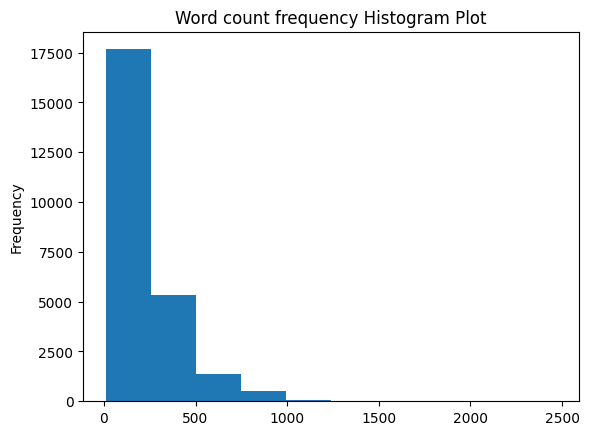

In [ ]:
# @title text_length

from matplotlib import pyplot as plt
df['text_length'].plot(kind='hist', title="Word count frequency Histogram Plot")

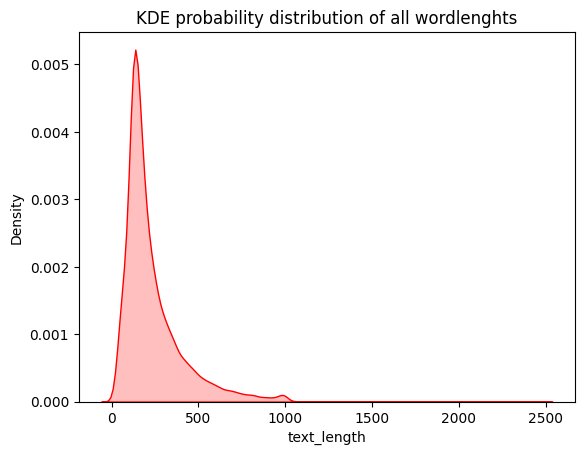

In [ ]:
sns.kdeplot(data=df, x='text_length', fill=True, color="red")
plt.title("KDE probability distribution of all wordlenghts")
plt.show()

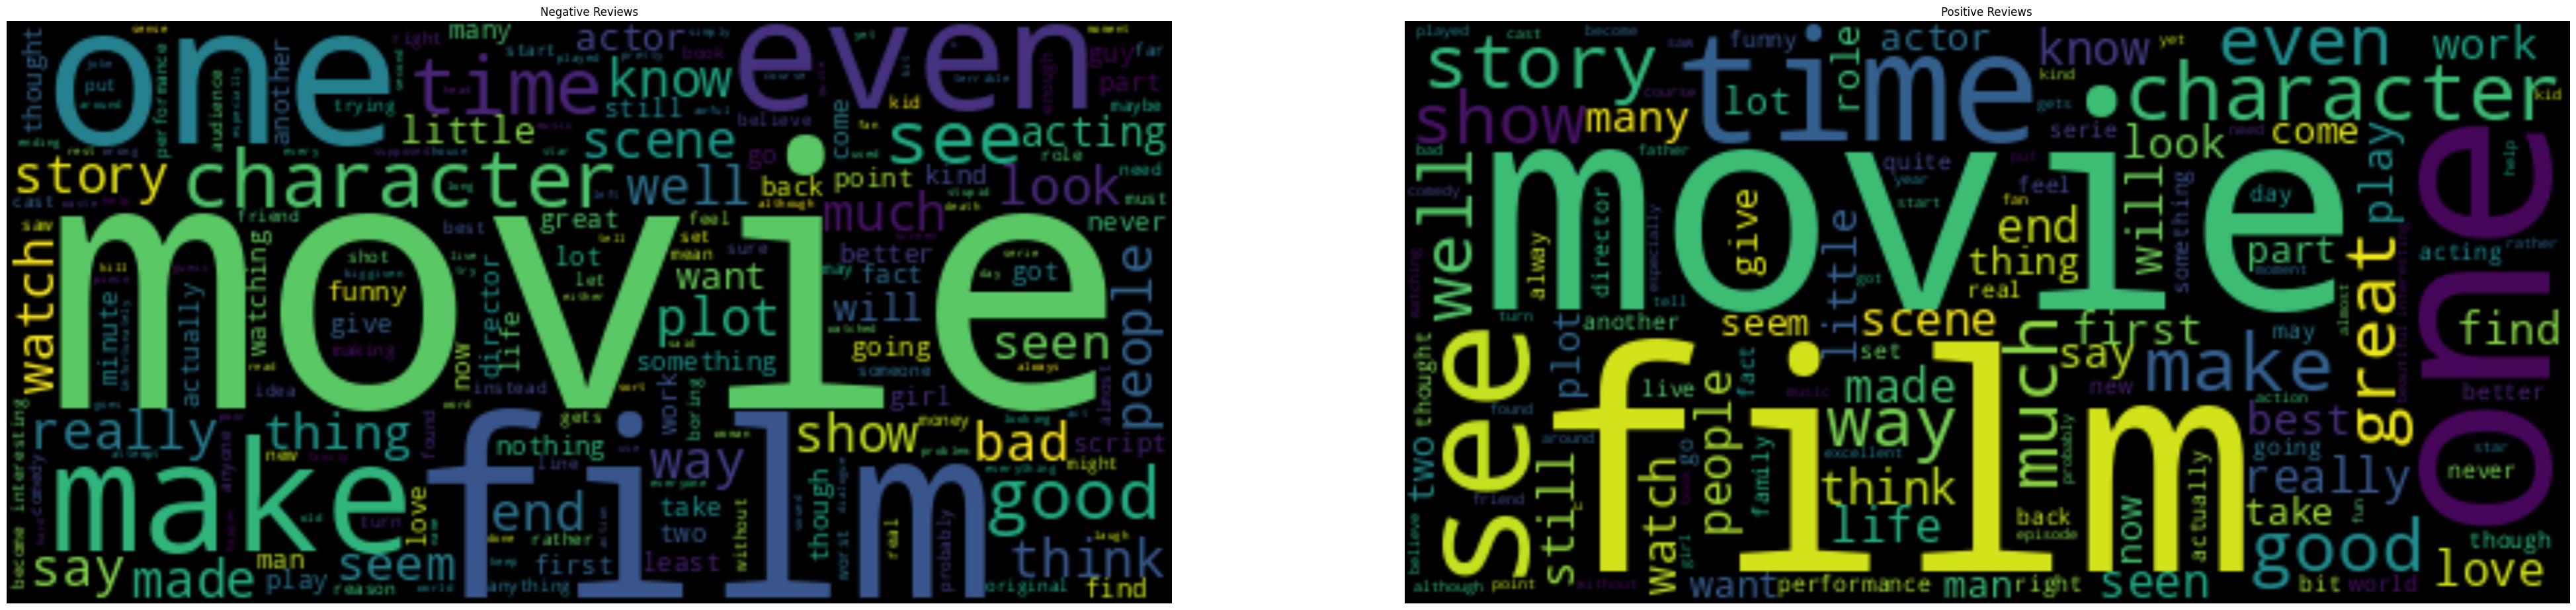

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["br"])

# generate word clouds for each label
all_negative_text = " ".join(df[df["label"] == 0]["text"])
wordcloud_negative = WordCloud(stopwords=custom_stopwords,
                               background_color="black").generate(all_negative_text)
all_positive_text = " ".join(df[df["label"] == 1]["text"])
wordcloud_positive = WordCloud(stopwords=custom_stopwords,
                               background_color="black").generate(all_positive_text)

plt.figure(figsize=(50, 50))

plt.subplot(1,2,1)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews")

plt.subplot(1,2,2)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews")

plt.show()

# Feature Importance

This code demonstrates how to extract and visualize feature importance from text data using TF-IDF (Term Frequency-Inverse Document Frequency) for text vectorization and Logistic Regression for classification.

Vectorizing the Text with TfidVectorizer

Explanation:
- **TF-IDF Vectorizer** : This converts the text data into numerical features. It measures how important a word is to a document in a collection or corpus.

**How Words Are Selected for the Vocabulary** The `TfidfVectorizer` selects the vocabulary based on:
1. **Frequency** : Words that appear more frequently across the corpus are considered.

2. **Filters** :
  - **Stopwords** : Common words (like "the", "is") are removed if stopwords are enabled.

  - **min_df**  and **max_df** : Words appearing too rarely or too frequently are ignored.

3. **Ranking** : If `max_features` is set, only the top `max_features` words (based on frequency or importance) are included.
  - `max_features=1000`: Limits the number of features (terms) to the top 1000 based on their importance. This helps with dimensionality reduction and ensures only the most informative words are used.

  - `fit_transform(df['text'])`: Fits the TF-IDF model to the text and transforms the text data into a sparse matrix, where each row represents a document, and each column represents a word. The values in the matrix represent the TF-IDF score for each word in each document.

- **X** : The transformed text data (numerical format).

- **y** : The target labels (sentiments, classes, etc.) in this case, which are assumed to be binary (e.g., positive or negative).


1. **Input Text (`df['text']`)** :
  - You have 25,000 text samples (documents) in your dataset, which forms the **rows**  of the resulting TF-IDF matrix.

2. **Vocabulary Size** :
  - You specified `max_features=1000` in the `TfidfVectorizer`, which limits the vocabulary size to the **top 1,000 most frequent or important words**  (features) across the entire corpus.

  - These words form the **columns**  of the TF-IDF matrix.

3. **Output Shape of `X`** :
  - After vectorization, the shape of the TF-IDF matrix (`X`) is `(25000, 1000)`, where:
    - `25000`: Number of rows = number of documents (one row for each document in `df['text']`).

    - `1000`: Number of columns = number of features in the vocabulary (top 1,000 words).

4. **Why is the shape `(25000, 1000)`?**  
  - The matrix is a **document-term matrix** , where each row corresponds to a document, and each column corresponds to a word from the selected vocabulary.

  - The value at position `(i, j)` in the matrix represents the **TF-IDF score**  of the `j`-th word in the vocabulary for the `i`-th document.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
# vectorizer.get_feature_names_out()
X = vectorizer.fit_transform(df['text'])
y = df['label']


Training a Logistic Regression Model

#### Explanation:

- **Logistic Regression** : This is a classification algorithm used to predict binary outcomes (e.g., 0 or 1). In this case, the model will predict sentiment (positive or negative) based on the text data.
  - The `fit(X, y)` method trains the model using the transformed text data `X` and the target labels `y`.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()


Extracting Feature Importance

Explanation:

- **`model.coef_[0]`** : The coefficients of the logistic regression model represent the weights for each feature (word) in the prediction. For binary classification, `model.coef_` is a 2D array where each row corresponds to a class (0 or 1) and each column corresponds to a feature. For a binary classification model, `model.coef_[0]` gives the importance of each feature for class 0 (negative sentiment), and `model.coef_[1]` would be for class 1 (positive sentiment).

- **`vectorizer.get_feature_names_out()`** : This gets the actual feature names (words) that correspond to the columns in the TF-IDF matrix.

- **`pd.DataFrame(...)`** : A DataFrame is created with two columns:
  - `feature`: The words extracted from the text data.

  - `importance`: The coefficients (importance scores) from the logistic regression model.

- **`sort_values('importance', ascending=False)`** : This sorts the features by their importance, in descending order, so the most important features appear first.


In [ ]:
# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': vectorizer.get_feature_names_out(),
    'importance': model.coef_[0]
}).sort_values('importance', ascending=False)


Plotting

Explaination:

- **`head(10)`** : Selects the top 10 features with the highest importance.

- **`tail(10)`** : Selects the bottom 10 features (those with the least importance).

- **`plot(kind='bar', x='feature', y='importance', legend=False)`** : Plots the top 10 and bottom 10 features as a bar chart.
  - The `x` axis represents the features (words), and the `y` axis represents their importance score.

  - `legend=False`: Disables the legend in the plot.

- **`plt.title()`** : Adds titles to the plots:
  - `"Top Positive Features"`: This title appears on the bar chart of the most important positive features.

  - `"Top Negative Features"`: This title appears on the bar chart of the least important features (or negative features).


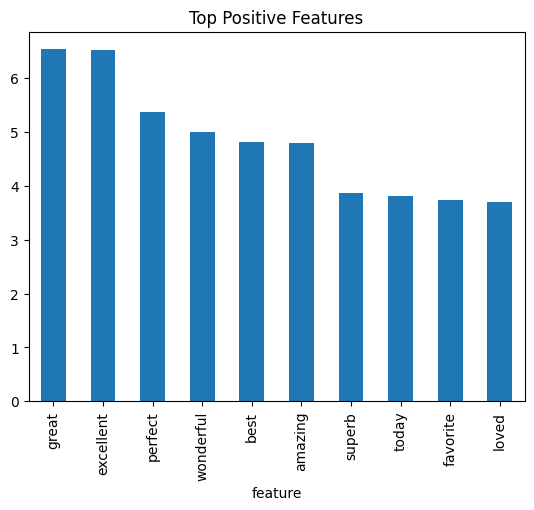

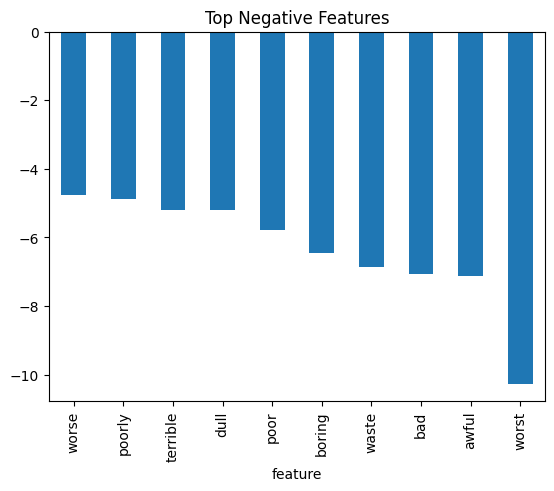

In [ ]:
# Plot top positive features
feature_importance.head(10).plot(kind='bar', x='feature', y='importance', legend=False)
plt.title('Top Positive Features')
plt.show()

# Plot top negative features
feature_importance.tail(10).plot(kind='bar', x='feature', y='importance', legend=False)
plt.title('Top Negative Features')
plt.show()
